In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('WHO.csv')

In [3]:
df.head()

Country                 Region  Population  Under15  Over60  \
0  Afghanistan  Eastern Mediterranean       29825    47.42    3.82   
1      Albania                 Europe        3162    21.33   14.93   
2      Algeria                 Africa       38482    27.42    7.17   
3      Andorra                 Europe          78    15.20   22.86   
4       Angola                 Africa       20821    47.58    3.84   

   FertilityRate  LifeExpectancy  ChildMortality  CellularSubscribers  \
0           5.40              60            98.5                54.26   
1           1.75              74            16.7                96.39   
2           2.83              73            20.0                98.99   
3           0.00              82             3.2                75.49   
4           6.10              51           163.5                48.38   

   LiteracyRate   GNI  PrimarySchoolEnrollmentMale  \
0           0.0  1140                          0.0   
1           0.0  8820                          0.0   
2           0.0  8310                         98.2   
3           0.0     0                         78.4   
4          70.1  5230                         93.1   

   PrimarySchoolEnrollmentFemale  
0                            0.0  
1                            0.0  
2                           96.4  
3                           79.4  
4                           78.2

In [4]:
train_df, test_df = train_test_split(df, test_size=0.3)

In [5]:
train_df.shape, test_df.shape

((135, 13), (59, 13))

### Data Preprocessing (On Train Data Only)

#### Missing Values

In [6]:
train_df.isnull().sum()

Country                          0
Region                           0
Population                       0
Under15                          0
Over60                           0
FertilityRate                    0
LifeExpectancy                   0
ChildMortality                   0
CellularSubscribers              0
LiteracyRate                     0
GNI                              0
PrimarySchoolEnrollmentMale      0
PrimarySchoolEnrollmentFemale    0
dtype: int64

In [7]:
train_df.head()

Country           Region  Population  Under15  Over60  \
5    Antigua and Barbuda         Americas          89    25.96   12.35   
68               Grenada         Americas         105    26.96    9.72   
174                Tonga  Western Pacific         105    37.33    7.96   
108            Mauritius           Africa        1240    20.17   13.23   
61                France           Europe       63937    18.26   23.82   

     FertilityRate  LifeExpectancy  ChildMortality  CellularSubscribers  \
5             2.12              75             9.9               196.41   
68            2.22              74            13.5                 0.00   
174           3.86              72            12.8                52.63   
108           1.51              74            15.1                99.04   
61            1.98              82             4.1                94.79   

     LiteracyRate    GNI  PrimarySchoolEnrollmentMale  \
5            99.0  17900                         91.1   
68            0.0  10350                          0.0   
174           0.0   5000                          0.0   
108          88.5  14330                          0.0   
61            0.0  35910                         99.1   

     PrimarySchoolEnrollmentFemale  
5                             84.5  
68                             0.0  
174                            0.0  
108                            0.0  
61                            99.3

In [8]:
# count of zeros
train_df[train_df==0].count()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                     9
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers               5
LiteracyRate                     63
GNI                              26
PrimarySchoolEnrollmentMale      66
PrimarySchoolEnrollmentFemale    66
dtype: int64

In [9]:
# percentage of zeros
train_df[train_df==0].count()/train_df.shape[0]

Country                          0.000000
Region                           0.000000
Population                       0.000000
Under15                          0.000000
Over60                           0.000000
FertilityRate                    0.066667
LifeExpectancy                   0.000000
ChildMortality                   0.000000
CellularSubscribers              0.037037
LiteracyRate                     0.466667
GNI                              0.192593
PrimarySchoolEnrollmentMale      0.488889
PrimarySchoolEnrollmentFemale    0.488889
dtype: float64

##### Step - 1 (Drop Columns)

In [10]:
cols_to_drop = ['Country', 'LiteracyRate', 'PrimarySchoolEnrollmentMale', 'PrimarySchoolEnrollmentFemale']
train_df_v2 = train_df.drop(cols_to_drop, axis=1)

##### Step-2 (Median Imputation)

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
train_df_v3 = train_df_v2.copy()
train_df_v3.replace(0, np.nan, inplace=True)
train_df_v3[['FertilityRate', 'CellularSubscribers', 'GNI']] = imputer.fit_transform(
    train_df_v3[['FertilityRate', 'CellularSubscribers', 'GNI']])

In [12]:
train_df_v3[train_df_v3==0].count()

Region                 0
Population             0
Under15                0
Over60                 0
FertilityRate          0
LifeExpectancy         0
ChildMortality         0
CellularSubscribers    0
GNI                    0
dtype: int64

In [13]:
train_df_v3.isnull().sum()

Region                 0
Population             0
Under15                0
Over60                 0
FertilityRate          0
LifeExpectancy         0
ChildMortality         0
CellularSubscribers    0
GNI                    0
dtype: int64

### Outlier Detection

In [14]:
import warnings
warnings.filterwarnings(action='ignore')

In [18]:
cols = train_df_v3.select_dtypes('number').columns

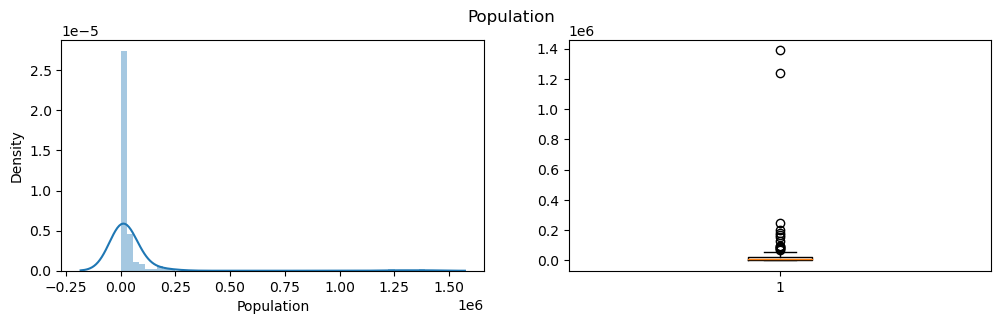

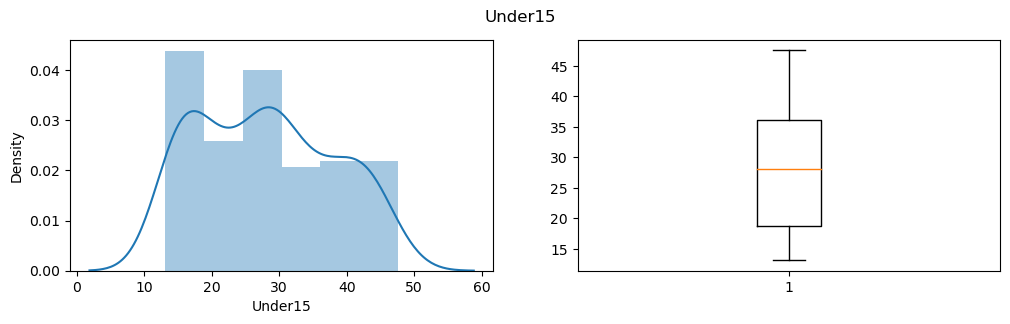

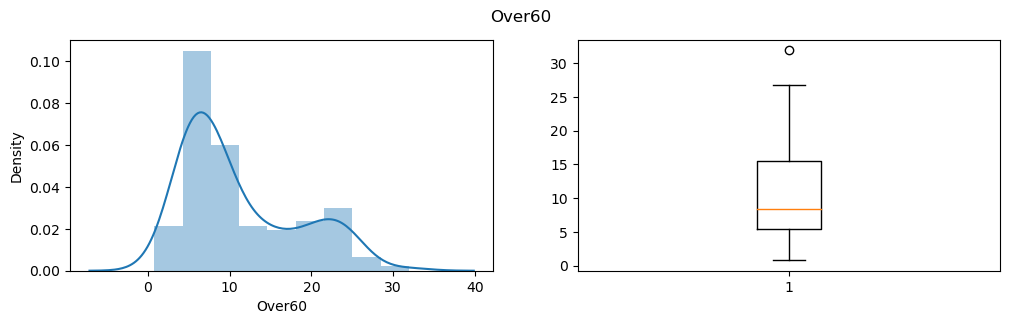

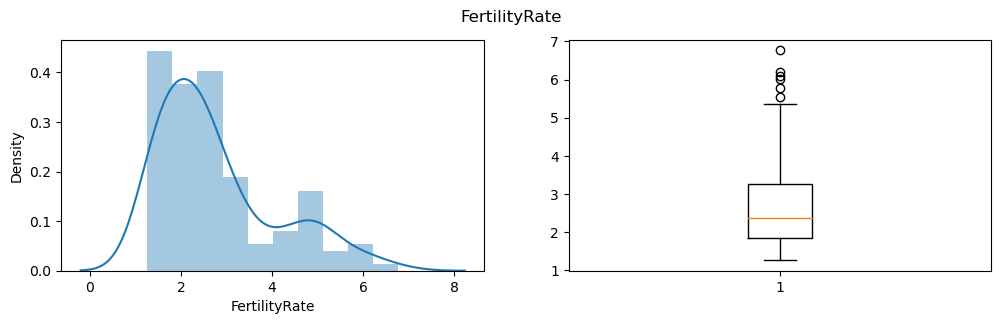

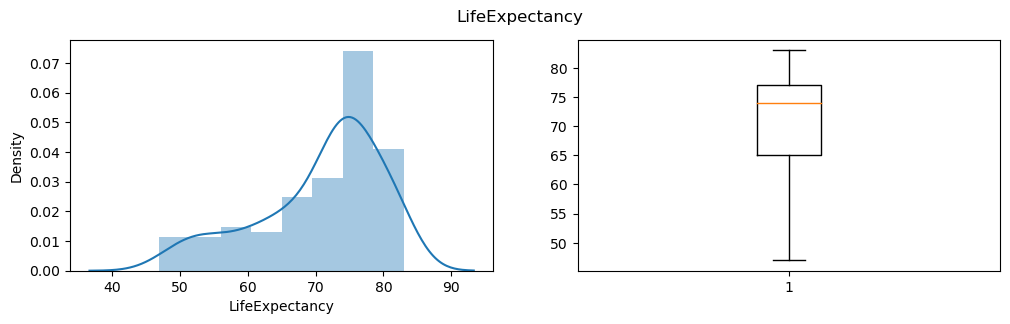

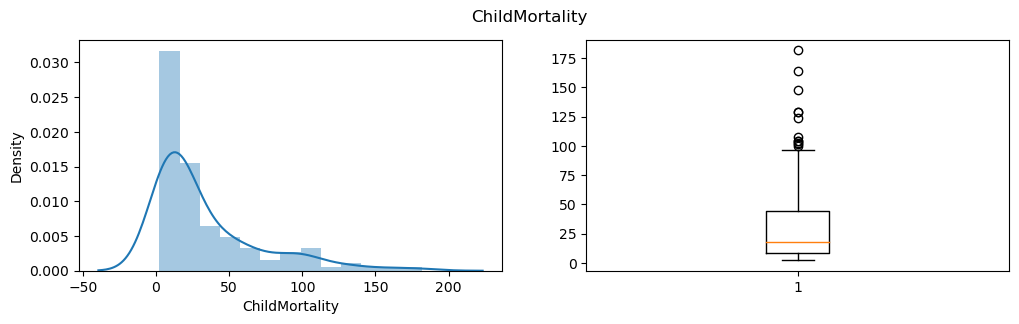

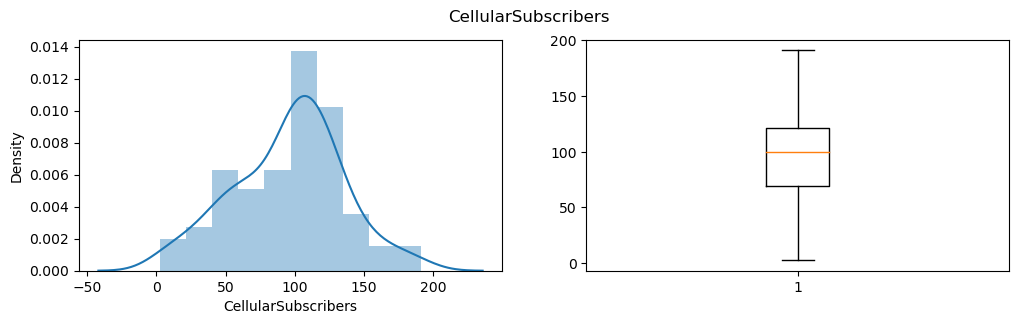

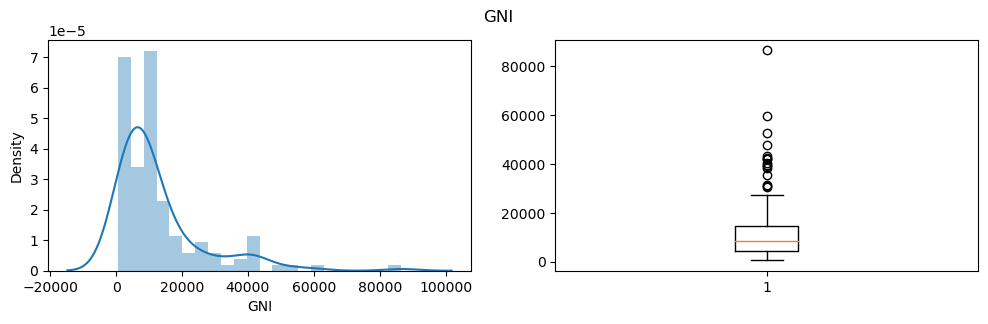

In [21]:
for col in cols:
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    sns.distplot(a=train_df_v3[col])
    plt.subplot(122)
    plt.boxplot(train_df_v3[col])
    plt.suptitle(col);

In [15]:
def detect_outliers(df, col, Q1=25, Q3=75):
    first_quartile = np.percentile(df[col], Q1)
    third_quartile = np.percentile(df[col], Q3)
    IQR = third_quartile-first_quartile
    lower_boundry = first_quartile - 1.5*IQR
    upper_boundry = third_quartile + 1.5*IQR
    df_outliers = df[(df[col]<lower_boundry) | (df[col]>upper_boundry)]
    return lower_boundry, upper_boundry, df_outliers

##### Population

In [16]:
lower_boundry, upper_boundry, df_outliers = detect_outliers(train_df_v3, 'Population')

In [17]:
df_outliers.shape[0]/train_df_v3.shape[0]

0.11851851851851852

In [18]:
detect_outliers(train_df_v3, 'Population')[-1].shape[0]/train_df_v3.shape[0]

0.11851851851851852

Text(0.5, 1.0, 'Log Scale')

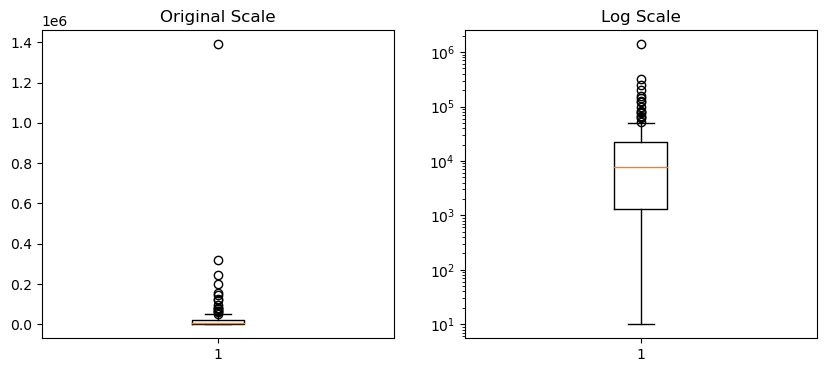

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.boxplot(train_df_v3.Population)
plt.title('Original Scale')
plt.subplot(122)
plt.boxplot(train_df_v3.Population)
plt.yscale('log')
plt.title('Log Scale')

In [20]:
lower_boundry, upper_boundry, df_outliers = detect_outliers(train_df_v3, 'Population', 5,95)

In [21]:
df_outliers.shape[0]

2

##### GNI

In [22]:
lower_boundry, upper_boundry, df_outliers = detect_outliers(train_df_v3, 'GNI')

In [23]:
df_outliers.shape[0]/train_df_v3.shape[0]

0.13333333333333333

Text(0.5, 1.0, 'Log Scale')

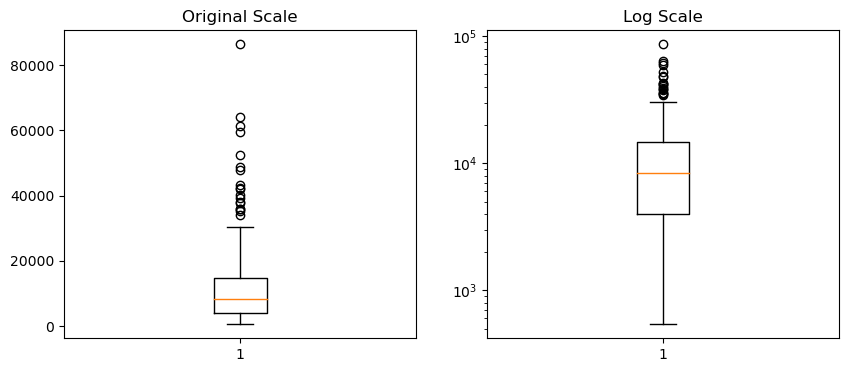

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.boxplot(train_df_v3.GNI)
plt.title('Original Scale')
plt.subplot(122)
plt.boxplot(train_df_v3.GNI)
plt.yscale('log')
plt.title('Log Scale')

In [25]:
lower_boundry, upper_boundry, df_outliers = detect_outliers(train_df_v3, 'GNI', 15,85)

In [26]:
df_outliers.shape[0]

2

In [27]:
upper_boundry

62966.99999999998

In [28]:
dc = {'Population': {}, 'GNI': {}}
lower_boundry, upper_boundry, df_outliers = detect_outliers(train_df_v3, 'Population', 5,95)
median = train_df_v3.drop(df_outliers.index)['Population'].median()
dc['Population']['upper_boundry'] = upper_boundry
dc['Population']['median'] = median

lower_boundry, upper_boundry, df_outliers = detect_outliers(train_df_v3, 'GNI', 15,85)
median = train_df_v3.drop(df_outliers.index)['GNI'].median()
dc['GNI']['upper_boundry'] = upper_boundry
dc['GNI']['median'] = median


In [29]:
dc

{'Population': {'upper_boundry': 306900.1, 'median': 7167.0},
 'GNI': {'upper_boundry': 62966.99999999998, 'median': 8360.0}}

##### Replacing Outliers in Population and GNI with median values

In [30]:
train_df_v4 = train_df_v3.copy()

idx = train_df_v4[train_df_v4.Population > dc['Population']['upper_boundry']].index
train_df_v4.loc[idx, 'Population'] = dc['Population']['median']

idx = train_df_v4[train_df_v4.GNI > dc['GNI']['upper_boundry']].index
train_df_v4.loc[idx, 'GNI'] = dc['GNI']['median']

### Encoding

In [31]:
train_df_v5 = train_df_v4.copy()
le = LabelEncoder()
train_df_v5['Region'] = le.fit_transform(train_df_v5['Region'])

In [32]:
train_df_v5.head()

Region  Population  Under15  Over60  FertilityRate  LifeExpectancy  \
5         1          89    25.96   12.35           2.12              75   
68        1         105    26.96    9.72           2.22              74   
174       5         105    37.33    7.96           3.86              72   
108       0        1240    20.17   13.23           1.51              74   
61        3       63937    18.26   23.82           1.98              82   

     ChildMortality  CellularSubscribers      GNI  
5               9.9              196.410  17900.0  
68             13.5               98.115  10350.0  
174            12.8               52.630   5000.0  
108            15.1               99.040  14330.0  
61              4.1               94.790  35910.0

### Feature Selection

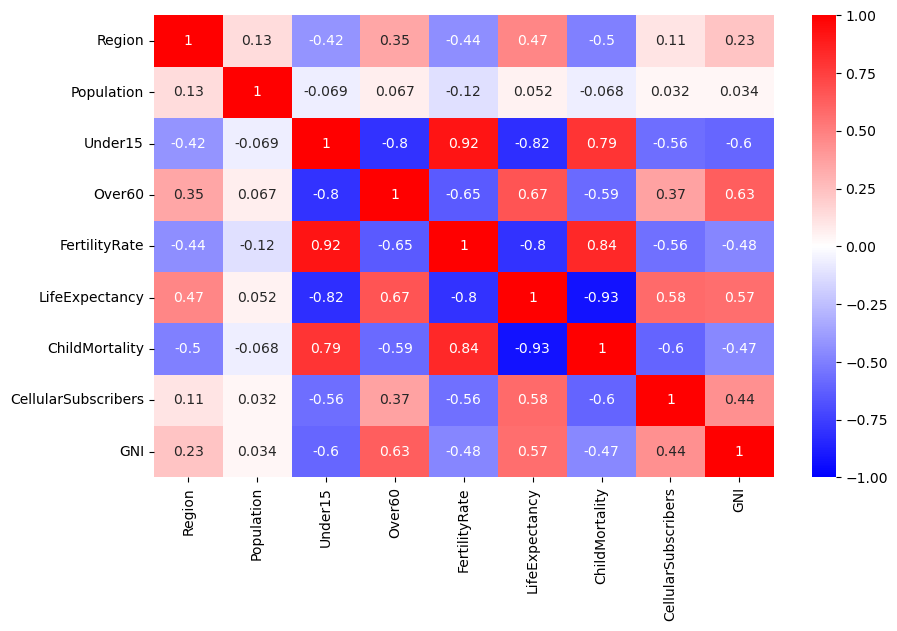

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df_v5.corr(), cmap='bwr', vmin=-1, vmax=1, annot=True);

<Axes: xlabel='Region', ylabel='LifeExpectancy'>

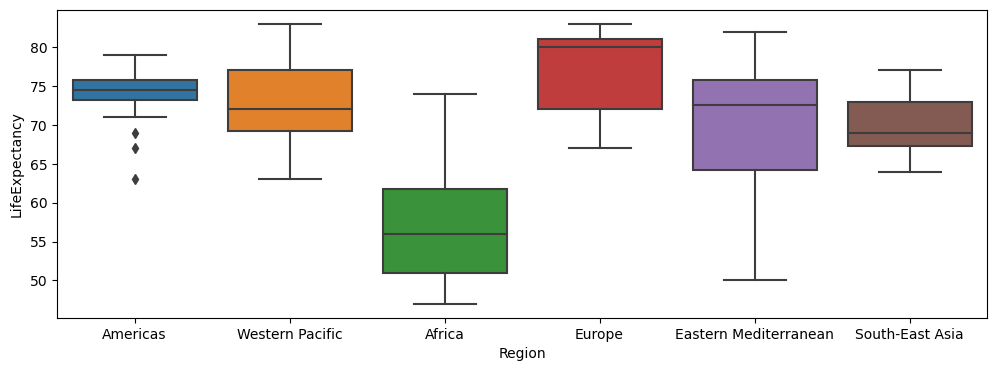

In [34]:
plt.figure(figsize=(12,4))
sns.boxplot(x=train_df_v4.Region, y=train_df_v4.LifeExpectancy)

#### Analysis Of Variance (ANOVA)

In [35]:
from scipy import stats
stats.f_oneway(train_df_v5.Region, train_df_v5.LifeExpectancy)

F_onewayResult(statistic=7305.034041475838, pvalue=1.7503583559408965e-196)

In [36]:
train_df_v6 = train_df_v5.drop('Population', axis=1)

### Model Building

In [37]:
X = train_df_v6.drop('LifeExpectancy', axis=1)
y = train_df_v6['LifeExpectancy']

In [38]:
linear_model = LinearRegression()
linear_model.fit(X,y)

LinearRegression()

In [39]:
linear_model.coef_, linear_model.intercept_

(array([ 6.81601029e-02, -2.06902122e-01,  8.67073227e-02,  1.32617879e+00,
        -1.97237928e-01,  2.16652905e-04,  6.47044140e-05]),
 77.53651715509935)

In [40]:
r2_score(y, linear_model.predict(X))

0.8963829317997294

### Preparing Test Data

In [41]:
cols_to_drop

['Country',
 'LiteracyRate',
 'PrimarySchoolEnrollmentMale',
 'PrimarySchoolEnrollmentFemale']

In [42]:
test_df_v2 = test_df.drop(cols_to_drop, axis=1)

In [43]:
test_df_v3 = test_df_v2.copy()
test_df_v3.replace(0, np.nan, inplace=True)
test_df_v3[['FertilityRate', 'CellularSubscribers', 'GNI']] = imputer.transform(
    test_df_v3[['FertilityRate', 'CellularSubscribers', 'GNI']])

In [44]:
dc

{'Population': {'upper_boundry': 306900.1, 'median': 7167.0},
 'GNI': {'upper_boundry': 62966.99999999998, 'median': 8360.0}}

In [45]:
test_df_v4 = test_df_v3.copy()
idx = test_df_v4[test_df_v4.GNI>dc['GNI']['upper_boundry']].index
test_df_v4.loc[idx,'GNI'] = dc['GNI']['median']

In [46]:
test_df_v5 = test_df_v4.copy()
test_df_v5['Region'] = le.transform(test_df_v5['Region'])

In [47]:
test_df_v6 = test_df_v5.drop('Population', axis=1)

In [48]:
test_X = test_df_v6.drop('LifeExpectancy',axis=1)
test_y = test_df_v6['LifeExpectancy']

In [49]:
pred_y = linear_model.predict(test_X)

In [50]:
r2_score(test_y, pred_y)

0.8605332505472146

### Pipelines

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [52]:
df = pd.read_csv('WHO.csv')

In [53]:
train_df, test_df = train_test_split(df, test_size=0.3)
features = ['Region',
 'Under15',
 'Over60',
 'FertilityRate',
 'ChildMortality',
 'CellularSubscribers',
 'GNI']
target = 'LifeExpectancy'

In [54]:
numeric_features = ['Under15', 'Over60', 'FertilityRate', 'ChildMortality',
                   'CellularSubscribers', 'GNI']
categorical_features = ['Region']

In [57]:
class OutlierTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lower_boundry = {}
        self.upper_boundry = {}
        self.median = {}
    def calculate_boundry(self, column):
        Q1 = np.percentile(column, 15)
        Q3 = np.percentile(column, 85)
        IQR = Q3-Q1
        lower_boundry = Q1-1.5*IQR
        upper_boundry = Q3+1.5*IQR
        return lower_boundry, upper_boundry
    def fit(self, X, y=None):
        for col in X.columns:
            lower_boundry, upper_boundry = self.calculate_boundry(X[col])
            median = np.median(X[col])
            self.lower_boundry[col] = lower_boundry
            self.upper_boundry[col] = upper_boundry
            self.median[col] = median
        return self
    def transform(self, X):
        X1 = X.copy()
        for col in X1.columns:
            idx = (X1[col] < self.lower_boundry[col]) | (X1[col] > self.upper_boundry[col])
            X1.loc[idx, col] = self.median[col]
        return X1

In [58]:
numeric_transformer = Pipeline(steps=[
    ('Zero_to_nan', FunctionTransformer(lambda x: x.replace(0, np.nan))),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('Encoding', OneHotEncoder(handle_unknown='ignore'))
])

outlier_detection = Pipeline(steps=[
    ('outlier detection', OutlierTransformer())
])

In [59]:
numeric_transformer

Pipeline(steps=[('Zero_to_nan',
                 FunctionTransformer(func=<function <lambda> at 0x169ab31a0>)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaling', MinMaxScaler())])

In [60]:
categorical_transformer

Pipeline(steps=[('Encoding', OneHotEncoder(handle_unknown='ignore'))])

In [61]:
outlier_detection

Pipeline(steps=[('outlier detection', OutlierTransformer())])

In [62]:
preprocessor = ColumnTransformer(transformers=[
    ('Numerical Data Processing', numeric_transformer, numeric_features),
    ('Categorical Data Preprocessing', categorical_transformer, categorical_features),
    ('Outlier Detection', outlier_detection, ['GNI'])
])

In [63]:
preprocessor

ColumnTransformer(transformers=[('Numerical Data Processing',
                                 Pipeline(steps=[('Zero_to_nan',
                                                  FunctionTransformer(func=<function <lambda> at 0x169ab31a0>)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling', MinMaxScaler())]),
                                 ['Under15', 'Over60', 'FertilityRate',
                                  'ChildMortality', 'CellularSubscribers',
                                  'GNI']),
                                ('Categorical Data Preprocessing',
                                 Pipeline(steps=[('Encoding',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Region']),
                                ('Outlier Detection',
                                 Pipeline(steps=[('outlier detection',
                                                  OutlierTransformer())]),
                                 ['GNI'])])

In [64]:
model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('linear_model', LinearRegression())
])

In [65]:
model_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Numerical Data Processing',
                                                  Pipeline(steps=[('Zero_to_nan',
                                                                   FunctionTransformer(func=<function <lambda> at 0x169ab31a0>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Under15', 'Over60',
                                                   'FertilityRate',
                                                   'ChildMortality',
                                                   'CellularSubscribers',
                                                   'GNI']),
                                                 ('Categorical Data '
                                                  'Preprocessing',
                                                  Pipeline(steps=[('Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region']),
                                                 ('Outlier Detection',
                                                  Pipeline(steps=[('outlier '
                                                                   'detection',
                                                                   OutlierTransformer())]),
                                                  ['GNI'])])),
                ('linear_model', LinearRegression())])

In [152]:
model_pipeline.fit(train_df[features], train_df[target])

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Numerical Data Processing',
                                                  Pipeline(steps=[('Zero_to_nan',
                                                                   FunctionTransformer(func=<function <lambda> at 0x1791c2de0>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Under15', 'Over60',
                                                   'FertilityRate',
                                                   'ChildMortality',
                                                   'CellularSubscribers',
                                                   'GNI']),
                                                 ('Categorical Data '
                                                  'Preprocessing',
                                                  Pipeline(steps=[('Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region']),
                                                 ('Outlier Detection',
                                                  Pipeline(steps=[('outlier '
                                                                   'detection',
                                                                   OutlierTransformer())]),
                                                  ['GNI'])])),
                ('linear_model', LinearRegression())])

In [154]:
model_pipeline.predict(test_df[features])

array([50.78785905, 75.4515497 , 71.12663531, 79.32445673, 78.80893144,
       73.9028219 , 63.88030839, 66.56337881, 70.84840139, 75.3025678 ,
       62.57418904, 72.42442791, 60.68556502, 73.66605963, 68.34664922,
       74.40774697, 75.46601805, 78.19855938, 53.94884656, 75.08105903,
       57.78625915, 72.96268084, 56.41641772, 64.5074611 , 78.94783021,
       80.48706421, 74.87865909, 56.55680696, 74.9127645 , 76.7464024 ,
       77.75412654, 73.4494229 , 65.79314695, 80.38001731, 82.23631547,
       81.77321196, 72.4793789 , 71.60479083, 66.08098151, 70.37911291,
       54.70584389, 69.07113943, 77.6602377 , 81.32123174, 78.41744841,
       76.33224865, 74.18888038, 74.20545277, 67.04325295, 78.18492099,
       68.14046022, 78.70128515, 75.49663867, 71.67848647, 61.3456606 ,
       71.67316979, 55.53565345, 72.69068659, 76.98001515])